<a href="https://colab.research.google.com/github/Shayankr/Deep_Learning_Project/blob/master/Dods_vs_Cats(tf_keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this project, you'll write an algorithm to classify whether images contain either a dog or a cat. This is easy for humans, dogs, and cats. Your computer will find it a bit more difficult.**

In [1]:
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle/

In [2]:
import kaggle

In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

 98% 796M/812M [00:03<00:00, 235MB/s]
100% 812M/812M [00:03<00:00, 237MB/s]


The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels for test1.zip (1 = dog, 0 = cat).

In [5]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


Here, only I need train dataset.


So, unzip only **train.zip**

In [6]:
!unzip -q train.zip

In [7]:
import cv2

In [8]:
print("versio of cv2 is: ", cv2.__version__)

versio of cv2 is:  4.1.2


In [9]:
sample_image = cv2.imread("train/cat.0.jpg")

In [10]:
type(sample_image)

numpy.ndarray

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
sample_image.shape

(374, 500, 3)

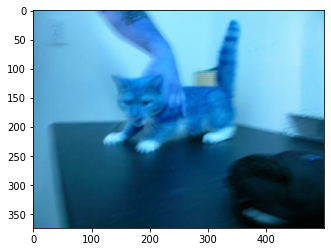

In [13]:
plt.imshow(sample_image)  # this image is with inverted color

In [14]:
sample_image2 = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

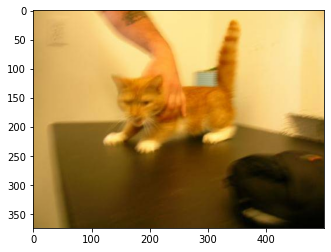

In [15]:
# now see the image with correct color
plt.imshow(sample_image2)

Now, check the size of other image

In [16]:
sample_image3 = cv2.imread("train/dog.0.jpg")

In [17]:
sample_image3.shape

(375, 499, 3)

In [18]:
sample_image.shape

(374, 500, 3)

**Here, different images have different shape/ size. So, I need to reshape all in one shape.** 

What shoulb be the **size?**

When you increase the size by huge amount, it may create problem.
because, increasing shape means, stretching the image, it leads to introduces noise

When image size is reduced by large amount, means compfressed, it may leads to loose some important informations.

So, try to make it **average size**.

Let's resize by **(150,150).**

In [19]:
import os

In [20]:
# Check all the filenames inside "train" directory.
os.listdir( "train/")[:5]

['dog.7613.jpg',
 'cat.1104.jpg',
 'dog.7431.jpg',
 'dog.10033.jpg',
 'cat.10863.jpg']

In [21]:
for filename in os.listdir("train")[:5]:
  print(filename)

dog.7613.jpg
cat.1104.jpg
dog.7431.jpg
dog.10033.jpg
cat.10863.jpg


**Let's assume**

**0--cat**

**1--dog**

In [22]:
allImages=[]
allLabels=[]

for filename in os.listdir("train/"):
  image = cv2.imread("train/"+filename)
  image = cv2.resize(image, (150,150))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  allImages.append(image)

  if "cat" in filename:
    allLabels.append(0)   # 0--cat
  if "dog" in filename:
    allLabels.append(1)   # 1-dog


In [23]:
len(allLabels)

25000

In [24]:
len(allImages)

25000

In [25]:
type(allImages)

list

In [26]:
# import numpy libraries
import numpy as np

In [27]:
type(allImages[0])

numpy.ndarray

In [28]:
# make  a numpy array from "allImages"--list, So, its size will becomes (no_of_images, 150,150, no_of_channels)

images = np.array(allImages)

In [29]:
# check type of variable images.
type(images)

numpy.ndarray

In [30]:
# Check shape of images
images.shape

(25000, 150, 150, 3)

<b>allLabels is also a type of list. So, it also needs to convert into numpy.ndarray.</b>

In [31]:
# convery "allLabels" into type-- np.ndarray.
labels = np.array(allLabels)

In [32]:
type(labels)

numpy.ndarray

In [33]:
labels.shape

(25000,)

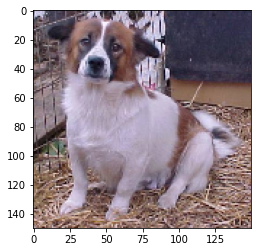

In [34]:
# see any random image say 1001th image
plt.imshow(images[1000])   # It shows the correct color images because invereted-color problem is already tackled.
# the image shape is (150,150,no__channels).
# all images have same shape(size) now.

1


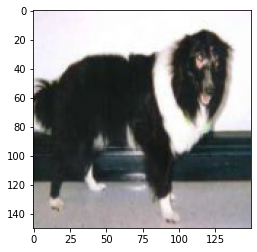

In [35]:
plt.imshow(images[10001])   # shape=(150,150,3)
print(labels[10001])  # also print labels for this image   # (0--cat and 1--dog.)
plt.show()

**we can also make a directory named-"train" and inside it put 2 directories named "cat" and "dog". and then put all cat images inside "cat" folder and all dog images inside "dog" folder.**

In [36]:
import shutil

**Shutil module in Python provides many functions of high-level operations on files and collections of files.**

In [37]:
# make directories
os.mkdir("train1")
os.mkdir("train1/cat")
os.mkdir("train1/dog")

In [38]:
# take variable name for directory_path
src_folder = "train/"
cat_folder = "train1/cat/"
dog_folder = "train1/dog/"

In [39]:
for image_name in os.listdir(src_folder):
  if "cat" in image_name:
    shutil.copy(src_folder+image_name, cat_folder)
  else:
    shutil.copy(src_folder+image_name, dog_folder)
    

In [100]:
os.listdir("train1/dog")[:10]

['dog.7613.jpg',
 'dog.7431.jpg',
 'dog.10033.jpg',
 'dog.11992.jpg',
 'dog.4043.jpg',
 'dog.4303.jpg',
 'dog.6116.jpg',
 'dog.7525.jpg',
 'dog.8852.jpg',
 'dog.10683.jpg']

In [98]:
# See list of all images in "dog" folder inside "train1" folder.
#!ls train1/dog
#os.listdir("train1/dog")

# list all dog images.
for i,filename in enumerate(os.listdir("train1/dog")):
  print(filename)
  if i >=10:
    break

dog.7613.jpg
dog.7431.jpg
dog.10033.jpg
dog.11992.jpg
dog.4043.jpg
dog.4303.jpg
dog.6116.jpg
dog.7525.jpg
dog.8852.jpg
dog.10683.jpg
dog.4131.jpg


In [93]:
# list all cat images.
for i,filename in enumerate(os.listdir("train1/cat")):
  print(filename)
  if i <=10:
    continue
  else:
    break

cat.1104.jpg
cat.10863.jpg
cat.9976.jpg
cat.8454.jpg
cat.11327.jpg
cat.4154.jpg
cat.10983.jpg
cat.3391.jpg
cat.8281.jpg
cat.2846.jpg
cat.1808.jpg
cat.4266.jpg


**IDG -- Image Data Generator**

tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
    horizontal_flip=False, vertical_flip=False, rescale=None,
    preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None
)

In [42]:
import tensorflow as tf


In [43]:
from tensorflow import keras

In [44]:
from keras.preprocessing.image import ImageDataGenerator

In [45]:
idg = ImageDataGenerator(rotation_range=45, width_shift_range=0.2, height_shift_range=0.2, 
                         zoom_range=0.2, horizontal_flip=True, rescale=1/255.0, validation_split=0.2)

In [46]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

In [47]:
img1 = load_img("train/cat.0.jpg")
img1 = img_to_array(img1)
img1 = np.expand_dims(img1, axis=0)

In [48]:
img1.shape

(1, 374, 500, 3)

In [49]:
from PIL import Image

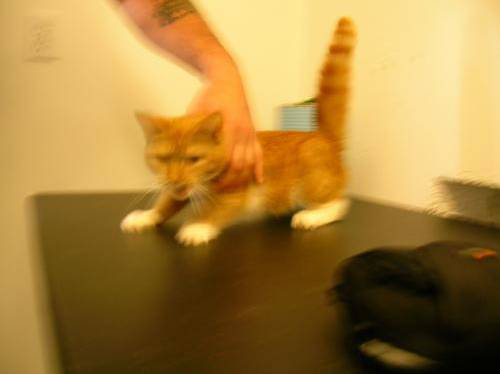

In [50]:
Image.open("train/cat.0.jpg")

**idg.flow()**

In [51]:
i=0
for _i in idg.flow(img1, batch_size=1, save_to_dir="sample_data"):
  i = i+1
  if i > 20:
    break

# see "sample_data" directory.

The **NVIDIA System Management Interface (nvidia-smi)** is a command line utility, based on top of the NVIDIA Management Library (NVML), intended to aid in the management and monitoring of NVIDIA GPU devices.

In [52]:
#Run below code---by changing runtype--to--GPU.

**Chech whether GPU is activated or not??**

In [53]:
!nvidia-smi

Wed Mar 16 16:48:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Make a template for ImageDataGenerator

In [54]:
idg = ImageDataGenerator(rotation_range=45, width_shift_range=0.2, height_shift_range=0.2, 
                         zoom_range=0.2, horizontal_flip=True, rescale=1/255.0, validation_split=0.2)

**idg.flow_from_directory**(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest')

In [55]:
train_generator = idg.flow_from_directory(directory="train1", target_size=(150,150), batch_size=128, subset="training" )

Found 20000 images belonging to 2 classes.


In [56]:
val_generator = idg.flow_from_directory(directory="train1", target_size=(150,150), batch_size=128, subset="validation" )

Found 5000 images belonging to 2 classes.


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD

In [58]:
model = Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(256, activation=relu))
model.add(Dense(64, activation=relu))
model.add(Dense(2, activation=softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 256)               17280256  
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 17,296,834
Trainable params: 17,296,834
Non-trainable params: 0
_________________________________________________________________


Compile by provising optimization process and loss and also matrics for accuracy.


In [59]:
model.compile(optimizer=SGD(learning_rate=0.01), 
              loss=categorical_crossentropy, 
              metrics=["acc"])

In [60]:
model.fit_generator(generator=train_generator, epochs=5, validation_data=val_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
157/157 [==============================] - 198s 1s/step - loss: 0.7325 - acc: 0.5267 - val_loss: 0.6808 - val_acc: 0.5750
Epoch 2/5
157/157 [==============================] - 193s 1s/step - loss: 0.6823 - acc: 0.5638 - val_loss: 0.6787 - val_acc: 0.5666
Epoch 3/5
157/157 [==============================] - 192s 1s/step - loss: 0.6777 - acc: 0.5727 - val_loss: 0.6920 - val_acc: 0.5394
Epoch 4/5
157/157 [==============================] - 193s 1s/step - loss: 0.6732 - acc: 0.5819 - val_loss: 0.6696 - val_acc: 0.5836
Epoch 5/5
157/157 [==============================] - 193s 1s/step - loss: 0.6721 - acc: 0.5849 - val_loss: 0.6681 - val_acc: 0.5904


**directory=train1**

inside directory -- "train1"

1st folder -- cat---"0"

2nd folder -- dog---"1"

In [61]:
y_predicted = model.predict_generator(val_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [62]:
y_predicted

array([[0.6483731 , 0.35162687],
       [0.4781357 , 0.5218643 ],
       [0.69196963, 0.3080304 ],
       ...,
       [0.54063493, 0.45936507],
       [0.38393384, 0.61606616],
       [0.7465408 , 0.2534592 ]], dtype=float32)

In [63]:
# cat--0
# dog--1

In [64]:
# get label Name   
def get_Label(number):
    labels = {0:'Cat', 1:'Dog'}
    return labels[number]

In [65]:
model.predict_function

In [66]:
#model:1 - Dog = 90% and Cat=10% - yes - this is the correct model, better confidence.
#model:2 - Dog = 60% and Cat=40%  -- less accurate model

In [67]:
# take random images from train folder and send to model.predict. 
# identify wrongly classified images - how to do this??

In [68]:
def get_image (image_path):
  img1 = load_img(image_path)
  img1 = img_to_array(img1)
  img1 = cv2.resize(img1, (150,150))
  img1 = np.expand_dims(img1, axis=0)
  return img1

In [69]:
test_image = get_image("train/cat.1.jpg")

In [70]:
model.predict(test_image)

array([[1.0000000e+00, 1.9195313e-29]], dtype=float32)

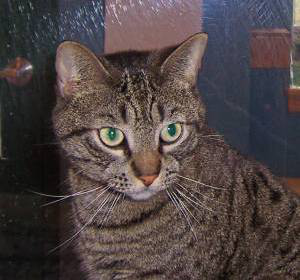

In [71]:
Image.open("train/cat.1.jpg")

In [72]:
# see waht is inside test1.zip
!unzip -q test1.zip

In [91]:
#!ls test1

# Chack all files present in the "test1"

In [74]:
i_=0
for i in os.listdir("test1/"):
  i_ += 1
print(i_)

12500


In [75]:
# "test1" folder--- only conatins images but no labelling

# this is only for those, who want to submit their model on kaggle.

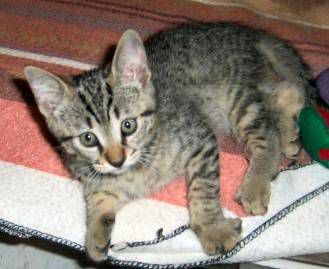

In [76]:
# see an image in test1
Image.open("test1/1783.jpg")

**Prepare data for prediction**

In [77]:
#get image path
test_images = os.listdir('test1/')

#creat data frame
import pandas as pd
df_test =pd.DataFrame({'image': test_images})

# view few rows
df_test.head()

,image
0,12169.jpg
1,9386.jpg
2,6631.jpg
3,307.jpg
4,1385.jpg


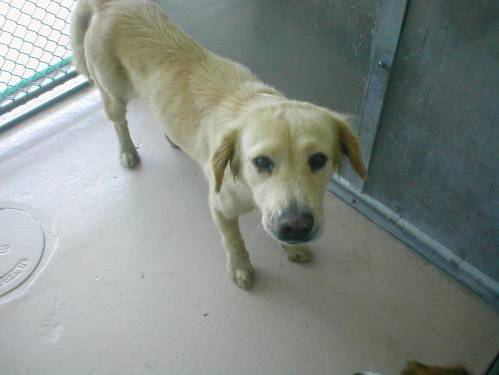

In [78]:
Image.open("test1/7918.jpg")

In [79]:
#prepare generator
idg_test  = ImageDataGenerator( rescale = 1./255, ) 

In [80]:
testing = idg_test.flow_from_dataframe(df_test,'test1/',
      x_col='image',
      y_col= None,
      target_size=(150,150),
      class_mode=None,
      shuffle=True, 
      batch_size=128
      )

Found 12500 validated image filenames.


In [81]:
df_test.shape

(12500, 1)

In [82]:
# There are 12500 images in the test_dataset "test1" directory.

**Prediction**

In [83]:
model.predict(testing)

array([[0.4980913 , 0.50190866],
       [0.5317725 , 0.4682275 ],
       [0.47685394, 0.5231461 ],
       ...,
       [0.6123838 , 0.3876162 ],
       [0.43478656, 0.5652135 ],
       [0.38682577, 0.61317426]], dtype=float32)

In [84]:
prediction = model.predict(testing)
np.argmax(prediction,axis=1)[0:100]

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [85]:
get_Label(1)

'Dog'

In [88]:
#plot prediction function
def plot_prediction(model_name):
    plt.figure(figsize=(20,15))
    plt.suptitle("Prediction  Images", fontsize=20)
    images = [] 
    path ='test1/'

    count = 0  #val_images,val_labels

    for i,files in enumerate(os.listdir(path)) :
        img = plt.imread(path+files)
        img = cv2.resize(img,(150,150))
        plt.imshow(img,cmap=plt.cm.binary)
        img = np.expand_dims(img, axis=0)
        prediction = model_name.predict(img)
        pred_label  = np.argmax(prediction, axis=1)

        plt.subplot(10,8,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel("Predicted"+get_Label(int(pred_label)))

        count += 1
        if count == 80 :
            break 

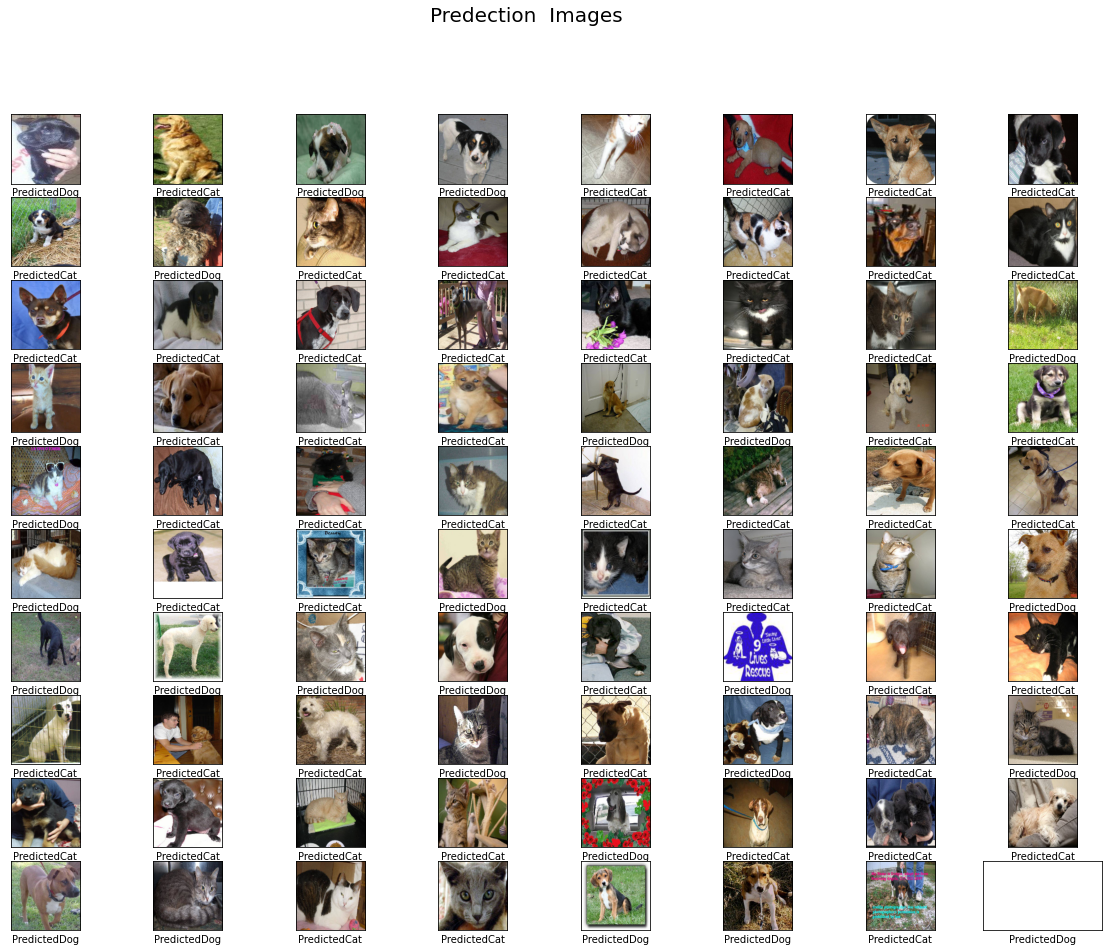

In [87]:
plot_prediction(model)

**END**